In [1]:
import numpy as np
from mat2json import loadMat
from keras.models import Sequential
from keras.layers import Dense
import keras
from keras.layers import Dense, Dropout, Flatten
from keras.layers import LeakyReLU
from keras.layers import LSTM
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
B0005 = loadMat('B0005.mat')

In [3]:
def extract_discharge(Battery):
    
    cap = []
    i = 1
    for Bat in Battery:
        if Bat['cycle'] == 'discharge':
            cap.append((Bat['data']['Capacity'][0]))
            i+=1
    return cap

In [6]:
A = extract_charge_VIT(B0005)
#print(A)
InitC = 1.85;
cap5 = extract_discharge(B0005);

In [7]:
xData_raw = A
comp = len(A) - len(cap5); 
yData_raw = np.vstack((InitC*np.ones((comp, 1)), np.reshape(cap5, (len(cap5), 1))))

In [8]:
xminmax = MinMaxScaler(feature_range=(0, 1)) # xData_raw feature scaling 
xData = xminmax.fit_transform(xData_raw) # feature scaling of xData_raw
#print(xData)
yminmax = MinMaxScaler(feature_range=(0, 1)) # yData_raw feature scaling 
yData = yminmax.fit_transform(yData_raw) # feature scaling of yData_raw
#print(yData)

In [12]:
# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(xData, yData, test_size = 0.20,shuffle = False)# split the data into train and test

In [13]:
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_test, y_test), 
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10)], verbose=1, shuffle=False)

# Training Phase
model.summary()

Epoch 1/200
4/4 [==============================] - 0s 79ms/step - loss: 0.3492 - val_loss: 0.2346
Epoch 2/200
4/4 [==============================] - 0s 10ms/step - loss: 0.2331 - val_loss: 0.1640
Epoch 3/200
4/4 [==============================] - 0s 9ms/step - loss: 0.1775 - val_loss: 0.1282
Epoch 4/200
4/4 [==============================] - 0s 8ms/step - loss: 0.1432 - val_loss: 0.1115
Epoch 5/200
4/4 [==============================] - 0s 8ms/step - loss: 0.1179 - val_loss: 0.1024
Epoch 6/200
4/4 [==============================] - 0s 13ms/step - loss: 0.1155 - val_loss: 0.0951
Epoch 7/200
4/4 [==============================] - 0s 8ms/step - loss: 0.1033 - val_loss: 0.0883
Epoch 8/200
4/4 [==============================] - 0s 9ms/step - loss: 0.0989 - val_loss: 0.0822
Epoch 9/200
4/4 [==============================] - 0s 12ms/step - loss: 0.0866 - val_loss: 0.0771
Epoch 10/200
4/4 [==============================] - 0s 12ms/step - loss: 0.0808 - val_loss: 0.0730
Epoch 11/200
4/4 [======

In [14]:
#Predicting network output
y_predict = model.predict(X_test) # predictions on test data

In [15]:
# calculate the prediction error
mape = np.sum(abs(y_test[:,0]- y_predict))/np.size(y_test)
print(mape)

0.041771157767402624


In [16]:
y_predict_actual = yminmax.inverse_transform(y_predict.reshape(-1,1)) # get the original a

In [17]:
y_test_actual = yminmax.inverse_transform(y_test[:,0].reshape(-1,1)) # get the original 

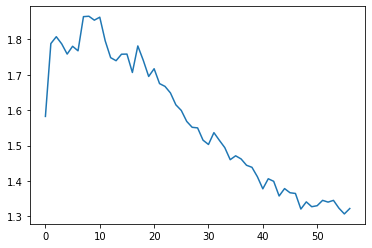

In [18]:
plt.plot(y_predict_actual)

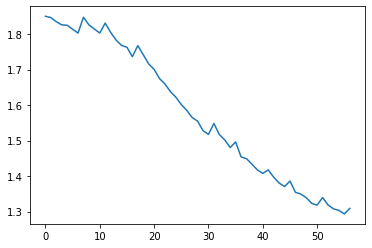

In [19]:
plt.plot(y_test_actual)

[Text(0.5, 1.0, 'LSTM')]

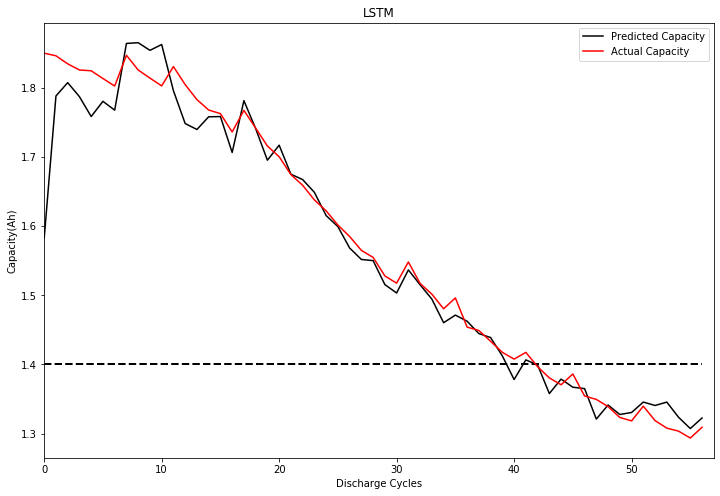

In [20]:
fig, ax = plt.subplots(1, figsize=(12, 8))
ax.plot(np.arange(57), 1.4*np.ones((57, 1)),'k--',linewidth = 2)
ax.plot(y_predict_actual, color='black',label='Predicted Capacity')
ax.plot(y_test_actual, color='red',label='Actual Capacity')
ax.set(xlabel='Discharge Cycles', ylabel='Capacity(Ah)')
ax.set_xlim([0,57])
#ax.set_ylim([0,2])
ax.legend()
ax.set(title = 'LSTM')

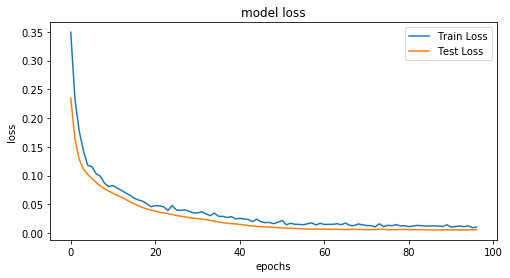

In [21]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();